# Lectura de Datos Desde Kaggle

In [38]:
import pandas as pd
from io import StringIO
import kaggle
import os

# Reemplaza 'autor/dataset' con el nombre correcto del dataset en Kaggle
dataset = "abhishek14398/salary-dataset-simple-linear-regression"  # Ejemplo

# Obtener lista de archivos del dataset
files = kaggle.api.dataset_list_files(dataset).files

# Selecciona el primer archivo CSV (o el que necesites)
csv_file = next(f for f in files if f.name.endswith('.csv'))

# Descarga el archivo
kaggle.api.dataset_download_file(dataset, csv_file.name, path='.')

# Leer el archivo descargado en un DataFrame
df = pd.read_csv(csv_file.name)

# Eliminar el archivo descargado
os.remove(csv_file.name)

print(df.head())

2025-03-03 21:43:23,880 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/list/abhishek14398/salary-dataset-simple-linear-regression?datasetVersionNumber=None&pageToken=None&pageSize=20


Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


# Descriptivos de Los Datos

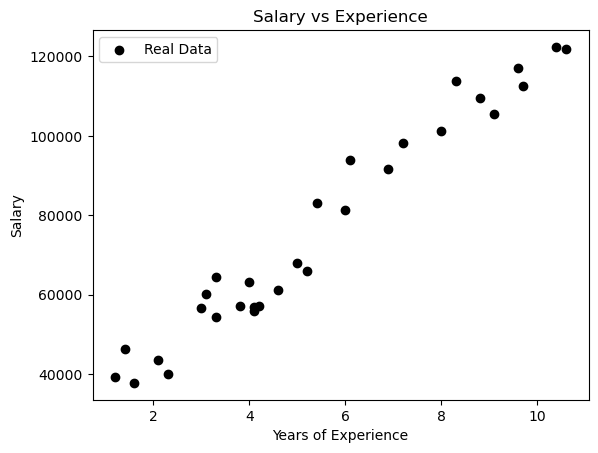

In [39]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Real Data')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

plt.savefig('Images/scatter_1.png')

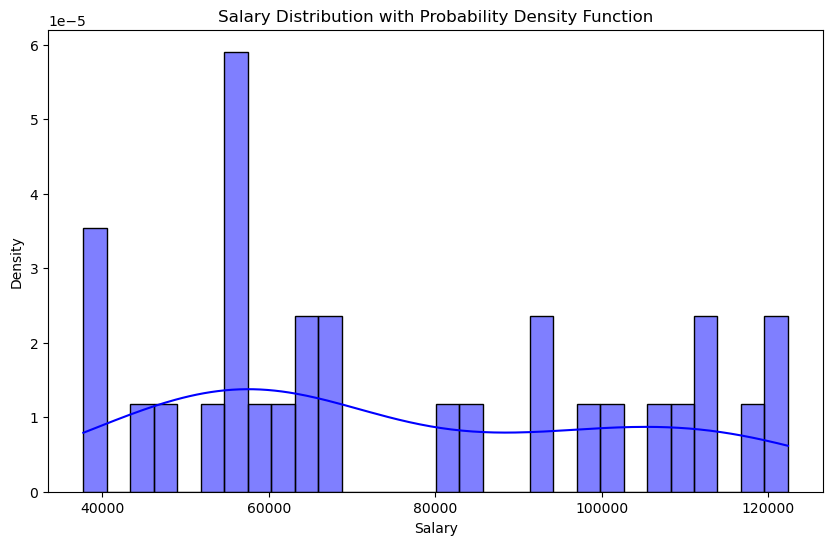

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined
# df = pd.read_csv('your_data.csv')

plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, stat="density", color='blue', bins=30)
plt.title('Salary Distribution with Probability Density Function')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

plt.savefig('Images/dis_Salary.png')

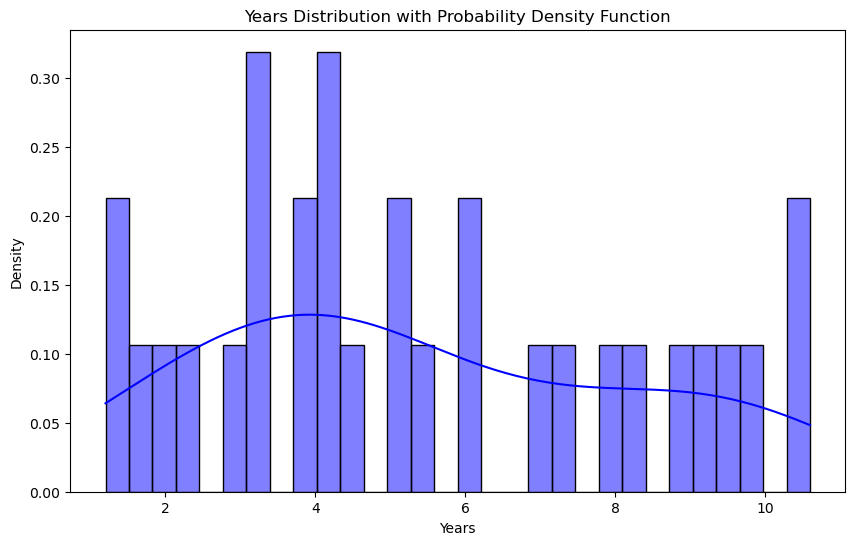

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined
# df = pd.read_csv('your_data.csv')

plt.figure(figsize=(10, 6))
sns.histplot(df['YearsExperience'], kde=True, stat="density", color='blue', bins=30)
plt.title('Years Distribution with Probability Density Function')
plt.xlabel('Years')
plt.ylabel('Density')
plt.show()

plt.savefig('Images/dis_years.png')

# Generación Modelo de Regresión

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = df

# Define features and target variable
X = data[['YearsExperience']]  # replace with your features
y = data['Salary']  # replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 49830096.855908334
R-squared: 0.9024461774180498


In [43]:
LINE_1 = []
LINE_2 = []

for i in np.arange(min(df['YearsExperience']), max(df['YearsExperience']) + 1, 1):
    LINE_1.append(i)
    LINE_2.append(model.predict([[i]])[0])

d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

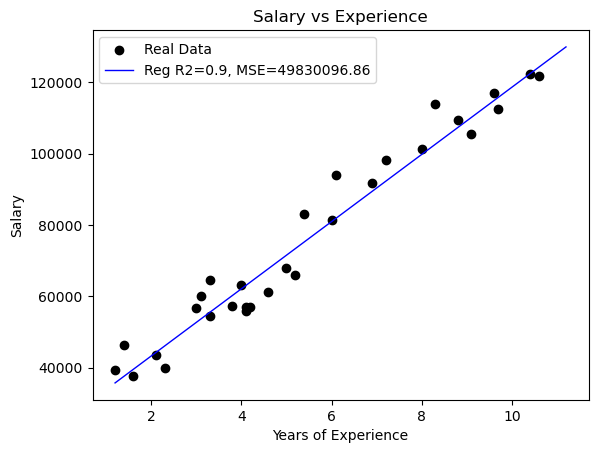

In [45]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Real Data')
plt.plot(LINE_1, LINE_2, color='blue', linewidth=1, label='Reg R2={}, MSE={}'.format(round(r2, 2), round(mse, 2)))
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

plt.savefig('Images/regre_1.png')

# Generación Modelo Regresión Polinómica

In [46]:
from sklearn.preprocessing import PolynomialFeatures

LINE_1 = []
LINE_2 = []
LINE_3 = []
LINE_4 = []
LINE_5 = []

for i in np.arange(2, 101, 1):
    print('Generando regresion para grado {}'.format(i))

    X = data[['YearsExperience']]  # replace with your features
    y = data['Salary']  # replace with your target variable

    # Create polynomial features
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)

    # Split the data into training and testing sets
    X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model_poly = LinearRegression()

    # Train the model
    model_poly.fit(X_train_poly, y_train)

    pred = model_poly.predict(X_test_poly)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print('Grado: {}, MSE: {}, R2: {}'.format(i, mse, r2))

    for j in np.arange(min(df['YearsExperience']), max(df['YearsExperience']) + 0.05, 0.05):
        LINE_1.append(j)
        sub = poly.fit_transform([[j]])
        pred = model_poly.predict(sub)
        LINE_2.append(pred[0])
        LINE_3.append(i)
        LINE_4.append(r2)
        LINE_5.append(mse)

df_poly = pd.DataFrame({'YearsExperience': LINE_1, 'Salary': LINE_2, 'Degree': LINE_3, 'R2': LINE_4, 'MSE': LINE_5})
df_poly

Generando regresion para grado 2
Grado: 2, MSE: 52527916.36877487, R2: 0.8971645780890872
Generando regresion para grado 3
Grado: 3, MSE: 48605815.3318873, R2: 0.9048429887854864
Generando regresion para grado 4
Grado: 4, MSE: 49557837.26106713, R2: 0.9029791879054301
Generando regresion para grado 5
Grado: 5, MSE: 46560480.97329093, R2: 0.9088471990465311
Generando regresion para grado 6
Grado: 6, MSE: 44676156.57289518, R2: 0.9125361954531526
Generando regresion para grado 7
Grado: 7, MSE: 54512859.54947298, R2: 0.8932785973845943
Generando regresion para grado 8
Grado: 8, MSE: 53471860.84642296, R2: 0.8953165906696372
Generando regresion para grado 9
Grado: 9, MSE: 71129460.0997882, R2: 0.860747797641459
Generando regresion para grado 10
Grado: 10, MSE: 49708268.1695609, R2: 0.9026846849627511
Generando regresion para grado 11
Grado: 11, MSE: 46882027.17922774, R2: 0.9082176987343691
Generando regresion para grado 12
Grado: 12, MSE: 44063064.8121985, R2: 0.9137364629345185
Generando

,YearsExperience,Salary,Degree,R2,MSE
0,1.20,3.673198e+04,2,0.897165,5.252792e+07
1,1.25,3.716595e+04,2,0.897165,5.252792e+07
2,1.30,3.760032e+04,2,0.897165,5.252792e+07
3,1.35,3.803510e+04,2,0.897165,5.252792e+07
4,1.40,3.847027e+04,2,0.897165,5.252792e+07
...,...,...,...,...,...
18706,10.40,1.223920e+05,100,-551.332174,2.821290e+11
18707,10.45,1.871276e+08,100,-551.332174,2.821290e+11
18708,10.50,4.197298e+08,100,-551.332174,2.821290e+11
18709,10.55,5.269095e+08,100,-551.332174,2.821290e+11


# Grafica de Regresiones

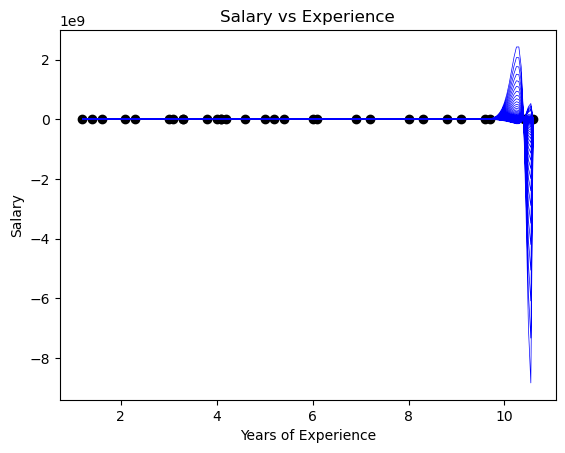

In [47]:
plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Real Data')
plt.plot(df_poly['YearsExperience'], df_poly['Salary'], color='blue', linewidth=0.5, label='Reg R2={}, MSE={}'.format(round(r2, 4), round(mse, 2)))
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.savefig('Images/regre_2.png')

In [48]:
import matplotlib.pyplot as plt
import imageio
import pandas as pd

# Assuming df and df_poly are already defined
# df = pd.read_csv('your_data.csv')
# df_poly = pd.read_csv('your_poly_data.csv')

filenames = []

for i in np.arange(2, 101, 1):
    print(i)
    sub = df_poly[df_poly['Degree'] == i]
    plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Real Data')
    plt.plot(sub['YearsExperience'], sub['Salary'], color='blue', linewidth=0.5, label='Reg {} R2={}, MSE={}'.format(max(sub['Degree']), round(max(sub['R2']), 4), round(max(sub['MSE']), 2)))
    plt.title('Salary vs Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    
    filename = f'Images/plot_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create a GIF
with imageio.get_writer('Images/salary_vs_experience.gif', mode='I', duration=200, loop=0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up the individual plot files
import os
for filename in filenames:
    os.remove(filename)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


C:\Users\User\AppData\Local\Temp\ipykernel_10896\4134897778.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [50]:
r_df = df_poly.groupby('Degree').agg({'R2': 'max', 'MSE': 'min'}).reset_index()
r_df

,Degree,R2,MSE
0,2,0.897165,5.252792e+07
1,3,0.904843,4.860582e+07
2,4,0.902979,4.955784e+07
3,5,0.908847,4.656048e+07
4,6,0.912536,4.467616e+07
...,...,...,...
94,96,-329.940685,1.690432e+11
95,97,-375.220416,1.921719e+11
96,98,-426.641307,2.184374e+11
97,99,-485.031493,2.482629e+11


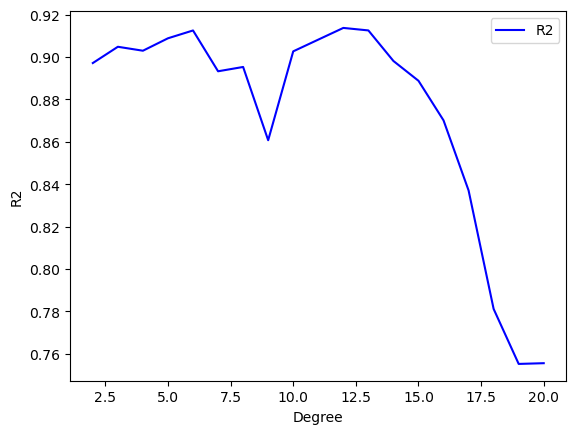

In [56]:
r2_df_sub = r_df[r_df['Degree'] <= 20]

plt.plot(r2_df_sub['Degree'], r2_df_sub['R2'], color='blue', label='R2')
plt.xlabel('Degree')
plt.ylabel('R2')
plt.legend()

plt.savefig('Images/R2.png')

# Regresión Ideal

In [57]:
best_df = df_poly[df_poly['R2'] == max(df_poly['R2'])]
best_df

,YearsExperience,Salary,Degree,R2,MSE
1890,1.20,40029.946986,12,0.913736,4.406306e+07
1891,1.25,41553.602854,12,0.913736,4.406306e+07
1892,1.30,42500.323841,12,0.913736,4.406306e+07
1893,1.35,42981.060601,12,0.913736,4.406306e+07
1894,1.40,43095.983738,12,0.913736,4.406306e+07
...,...,...,...,...,...
2074,10.40,122409.982086,12,0.913736,4.406306e+07
2075,10.45,122098.736237,12,0.913736,4.406306e+07
2076,10.50,121780.560455,12,0.913736,4.406306e+07
2077,10.55,121519.254303,12,0.913736,4.406306e+07


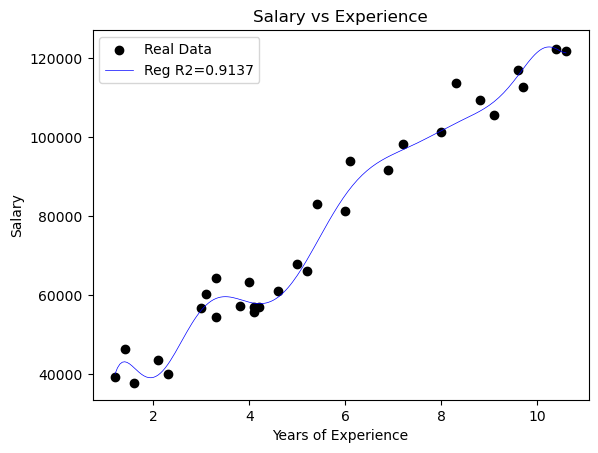

In [60]:
plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Real Data')
plt.plot(best_df['YearsExperience'], best_df['Salary'], color='blue', linewidth=0.5, label='Reg R2={}'.format(round(max(best_df['R2']), 4)))
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

plt.savefig('Images/regre_3.png')

# Salvado de Modelo

In [64]:
import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming data and best_df are already defined
# data = pd.read_csv('your_data.csv')
# best_df = pd.read_csv('your_best_df.csv')

X = data[['YearsExperience']]  # replace with your features
y = data['Salary']  # replace with your target variable

# Create polynomial features
poly = PolynomialFeatures(degree=max(best_df['Degree']))
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
model_poly = LinearRegression()

# Train the model
model_poly.fit(X_train_poly, y_train)

# Save the model
joblib.dump(model_poly, 'Model/model_poly.pkl')

# Save the polynomial features transformer
joblib.dump(poly, 'Model/poly_transformer.pkl')

# Evaluate the model
pred = model_poly.predict(X_test_poly)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Grado: {}, MSE: {}, R2: {}'.format(max(best_df['Degree']), mse, r2))

Grado: 12, MSE: 44063064.8121985, R2: 0.9137364629345185


In [73]:
a = poly.fit_transform(pd.DataFrame({'YearsExperience': [40]}))
model_poly.predict(a)

array([2.66764203e+16])